# Pictures are worth a thousand words

_This notebook is part of a tutorial series on [txtai](https://github.com/neuml/txtai), an AI-powered semantic search platform._

[txtai](https://github.com/neuml/txtai) executes machine-learning workflows to transform data and build AI-powered semantic search applications.

One of the hottest🔥 models as of June 2022 is [DALL-E mini](https://wandb.ai/dalle-mini/dalle-mini/reports/DALL-E-mini-Generate-images-from-any-text-prompt--VmlldzoyMDE4NDAy). There are a number of projects and examples utilizing this model as seen [here](https://huggingface.co/spaces/dalle-mini/dalle-mini), [here](https://github.com/borisdayma/dalle-mini) and [here](https://github.com/kuprel/min-dalle). There have even been mainstream news articles covering this model.

This notebook presents a workflow to build a summary of a webpage and then generate an image of this summary. While there are a number of potential use cases for text to image models, this example is focused on showing the power of workflows and also provides interesting insights into how DALL-E mini "sees" the world.

# Install dependencies

Install `txtai` and all dependencies. 

All credit for the DALL-E mini models and code goes to https://github.com/borisdayma/dalle-mini and https://github.com/kuprel/min-dalle.

In [16]:
%%capture
!pip install git+https://github.com/neuml/txtai tika min-dalle

# Build a DALL-E pipeline

Let's first construct a txtai pipeline that generates images using DALL-E mini.

In [17]:
from min_dalle import MinDalle

from txtai.pipeline import Pipeline

class Dalle(Pipeline):
  def __init__(self):
    self.model = MinDalle(is_mega=False, is_verbose=False)

  def __call__(self, texts, seed, prefix):
    results = []
    for text in texts:
      text = prefix + text
      results.append(self.model.generate_image(text, seed))

    return results


# Build DALL-E workflow

Next we'll define a txtai workflow as YAML. This workflow extracts text at a specified URL, builds a summary and then generates an image for the summary text. 

This workflow can be run from Python as shown below or as a [API service](https://neuml.github.io/txtai/api/).

In [18]:
from txtai.app import Application

app = Application("""
__main__.Dalle:
summary:
  path: sshleifer/distilbart-cnn-12-6
textractor:
  join: true
  lines: false
  minlength: 100
  paragraphs: true
  sentences: false
workflow:
  draw:
    tasks:
    - action: textractor
      task: url
    - action: summary
      args: [0, 60, 0]
    - action: __main__.Dalle
      args: [1024, "Illustration of "]
""")


# Generate image for webpage

Now that the workflow is up, let's generate an image! The following example generates an image for a Wikipedia article. Give this a try for articles, recipes or any other descriptive web page.

It's also fun to generate images for random Wikipedia pages using this url: https://en.wikipedia.org/wiki/Special:Random

In [19]:
%%capture
url = "https://en.wikipedia.org/wiki/football"
image = list(app.workflow("draw", [url]))[0]

2022-07-02 13:01:12,632 [MainThread  ] [INFO ]  Retrieving https://en.wikipedia.org/wiki/football to /tmp/wiki-football.
2022-07-02 13:01:12,632 [INFO] getRemoteFile: Retrieving https://en.wikipedia.org/wiki/football to /tmp/wiki-football.


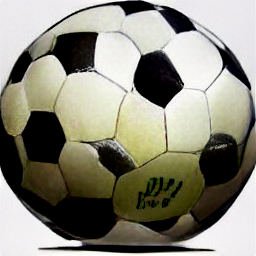

In [20]:
display(image)

# Wrapping up

This notebook walked through an example on how to build a txtai workflow to generate webpage summary images. DALL-E mini is a fascinating model and it's a lot of fun to "see" how the model works. Give it a try yourself!